### Project 2 
This explanation are mainly from different sections of the scikit-learn tutorial on text classification available at http://scikit-learn.org.

### Dataset
1. In this project we work with “20 Newsgroups” dataset. It is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic.
2. To manually load the data, you need to run this python code.<a href="https://www.dropbox.com/s/5oek8qbsge1y64b/fetch_data.py?dl=0">link to fetch_data.py</a>
3. Easiest way to load the data is to use the built-in dataset loader for 20 newsgroups from scikit-learn package.


### Problem (a)

In [106]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.graphics','rec.autos']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
def get_Number(fileName):
    count_vect = CountVectorizer()
    categories = [fileName]
    comp_graphic_train = fetch_20newsgroups(subset='train', categories=categories)
    comp_graphics_number = count_vect.fit_transform(comp_graphic_train.data)
    #print("(number of documents, number of features) = (%s, %s) " % comp_graphics_number.shape)
    [r,v] = comp_graphics_number.shape
    return r

comp_graphics_number = get_Number('comp.graphics')
comp_os_mswindows_misc_number = get_Number('comp.os.ms-windows.misc')
comp_sys_ibm_pc_hardware_number = get_Number('comp.sys.ibm.pc.hardware')
comp_sys_mac_hardware_number = get_Number('comp.sys.mac.hardware')
rec_autos_number = get_Number('rec.autos')
rec_motorcycles_number = get_Number('rec.motorcycles')
rec_sport_baseball_number = get_Number('rec.sport.baseball')
rec_sport_hockey_number = get_Number('rec.sport.hockey')

Number of class is = 2343
Number of class is = 2389


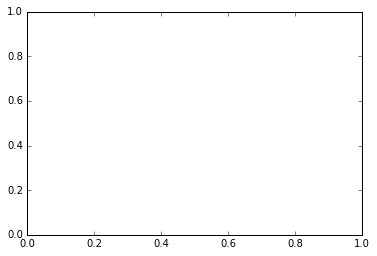

In [108]:
Number_Computer_technology = comp_graphics_number+comp_os_mswindows_misc_number+comp_sys_ibm_pc_hardware_number+comp_sys_mac_hardware_number
Number_Recreational_activity = rec_autos_number+rec_motorcycles_number+rec_sport_baseball_number+rec_sport_hockey_number

print("Number of class is = %s" % Number_Computer_technology)
print("Number of class is = %s" % Number_Recreational_activity)

import numpy as np
import matplotlib.pyplot as plt

n_groups = 8

document_number = (comp_graphics_number, comp_os_mswindows_misc_number, comp_sys_ibm_pc_hardware_number, comp_sys_mac_hardware_number, rec_autos_number, rec_motorcycles_number, rec_sport_baseball_number, rec_sport_hockey_number)

#fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4

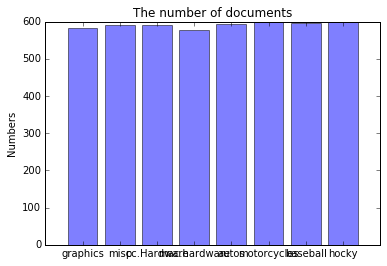

In [109]:
objects = ('graphics', 'misc', 'pc.Hardware', 'mac.hardware', 'autos', 'motorcycles','baseball','hocky')
y_pos = np.arange(len(objects))

%matplotlib inline
plt.figure()
plt.bar(y_pos, document_number, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Numbers')
plt.title('The number of documents')
plt.show()


### Extracting features from text files

### Problem (b)

In [10]:
from sklearn.feature_extraction import text
import string
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
stop_words = text.ENGLISH_STOP_WORDS.union(string.punctuation)

In [11]:
categories = ['comp.graphics','rec.autos']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

The converse mapping from feature name to column index is stored in the vocabulary_ attribute of the vectorizer:

In [13]:
# import nltk
# import collections
# from nltk import word_tokenize
# # from nltk.stem.snowball import SnowballStemmer
# from nltk.stem import PorterStemmer
# tokens = [word for sent in nltk.sent_tokenize(twenty_train.data) for word in nltk.word_tokenize(sent)]
# #print tokenss
# # stemmer = SnowballStemmer("english")
# stemmer = PorterStemmer()
# #stemmed = []
# #for item in tokens:
# #   stemmed.append(stemmer.stem(item))
# stems = [stemmer.stem(t) for t in tokens]
# # print stemmed

TypeError: expected string or buffer

In [ ]:
# import string
# import collections
 
# from nltk import word_tokenize
# from nltk.stem import PorterStemmer
# #from nltk.corpus import stopwords
# from sklearn.cluster import KMeans
# from sklearn.feature_extraction.text import TfidfVectorizer
# def process_text(text, stem=True):
#     """ Tokenize text and stem words removing punctuation """
#     text = text.translate(None, string.punctuation)
#     tokens = word_tokenize(text)

#     if stem:
#         stemmer = PorterStemmer()
#         tokens = [stemmer.stem(t) for t in tokens]
 
#     return tokens

In [29]:
import nltk
import re
import string
stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    
    tokens =[word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]{2,}', token):
            filtered_tokens.append(token)
        
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems
print type<token>

SyntaxError: invalid syntax (<ipython-input-29-3bd406718308>, line 19)

In [28]:
count_vect = TfidfVectorizer(tokenizer=tokenize_and_stem,min_df=1,stop_words= stop_words, token_pattern='[a-zA-Z]{2,}')
# count_vect = CountVectorizer(min_df=1, stop_words= stop_words, token_pattern='[a-zA-Z]{2,}')
# X_train_counts = count_vect.fit_transform(stemmed)
X_train_counts = count_vect.fit_transform(twenty_train.data)
print X_train_counts.shape
#X_train_counts
#print(X_train_counts[0,3949])
#0, 6035
print (count_vect.get_feature_names())

TypeError: character mapping must return integer, None or unicode

In [22]:
#from sklearn.feature_extraction.text import TfidfTransformer
#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#print (X_train_tfidf)
# X_train_tfidf.toarray()[:30,:10]

In [30]:
#nltk.download()

showing info http://www.nltk.org/nltk_data/


True

### Problem (c)

In [116]:
categories = ['comp.graphics','rec.autos']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
count_vect = TfidfVectorizer(min_df=1, stop_words= stop_words, token_pattern='[a-zA-Z]{2,}')
X_train_counts = count_vect.fit_transform(twenty_train.data)

In [117]:
def get_max_feature(fileName):
    categories = [fileName]
    twenty_train_c = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    count_vect_c = TfidfVectorizer(min_df=1, max_features=10, stop_words= stop_words, token_pattern='[a-zA-Z]{2,}')
    X_train_counts_c = count_vect_c.fit_transform(twenty_train_c.data)
    return count_vect_c.vocabulary_.keys()


print (get_max_feature('comp.sys.ibm.pc.hardware'))
print (get_max_feature('comp.sys.mac.hardware'))
print (get_max_feature('misc.forsale'))
print (get_max_feature('soc.religion.christian'))

[u'drive', u'com', u'card', u'scsi', u'ide', u'subject', u'organization', u'lines', u'mb', u'edu']
[u'subject', u'com', u'university', u'mac', u'posting', u'nntp', u'organization', u'apple', u'lines', u'edu']
[u'organization', u'com', u'university', u'new', u'posting', u'subject', u'sale', u'lines', u'host', u'edu']
[u'organization', u'people', u'subject', u'church', u'jesus', u'god', u'think', u'lines', u'edu', u'know']


### Problem (d)

In [118]:
from sklearn.decomposition import TruncatedSVD
tsv = TruncatedSVD(n_components=50,algorithm='arpack')
X_train_lsi = tsv.fit_transform(X_train_counts)
print (X_train_lsi.shape)

(1178, 50)


### Training a classifier

Let's train a classifier to predict the category of a post.

### Problem (e)

In [197]:
def data_process(twenty_test):
    count_vect_test = TfidfVectorizer(min_df=1, stop_words= stop_words, token_pattern='[a-zA-Z]{2,}')
    X_test_counts = count_vect_test.fit_transform(twenty_test.data)
    tsv_test = TruncatedSVD(n_components=50,algorithm='arpack')
    X_test_lsi = tsv_test.fit_transform(X_test_counts)
    return X_test_lsi

In [196]:
from sklearn.svm import LinearSVC
clf = LinearSVC(C=10e10).fit(X_train_lsi, twenty_train.target)

In [198]:
X_test_lsi = data_process(twenty_test)
predicted = clf.predict(X_test_lsi)
print predicted.shape
score = clf.score(X_test_lsi, twenty_test.target)
print score

(785,)
0.807643312102


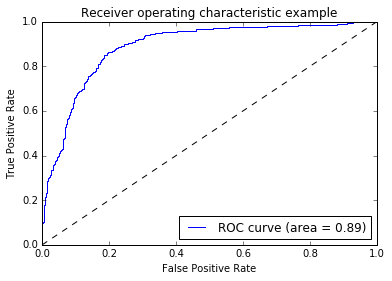

In [199]:
from sklearn.metrics import roc_curve, auc
y_score=clf.decision_function(X_test_lsi)
fpr, tpr, _ = roc_curve(twenty_test.target, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

##### Confusion matrix. [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [200]:
from sklearn.metrics import confusion_matrix
y_true = twenty_test.target
y_pred = predicted
print confusion_matrix(y_true, y_pred)

[[260 129]
 [ 22 374]]


##### Recall and precision of your classifier. [Reference Link](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

In [201]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
X_train = X_train_lsi
X_test = X_train_lsi
y_train = twenty_train.target
y_test = twenty_test.target
y_score = clf.decision_function(X_test_lsi)
y = label_binarize(twenty_train.target, classes=[0, 1])
# n_classes = y.shape
#print n_classes
# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
#for i in range(n_classes):
precision, recall, _ = precision_recall_curve(y_test,y_score)    
average_precision = average_precision_score(y_test, y_score)

# print precision
# print recall
print average_precision

0.881551849933


### Problem (f)

In [202]:
from sklearn.cross_validation import KFold
kf = KFold(n=len(twenty_train.target), n_folds=5, shuffle=False, random_state=None)
twenty_train_data = data_process(twenty_train)
twenty_test_data = data_process(twenty_test)
l = [[0]*7 for i in range(5)]
i=0
j=0
#la=[]
for train_index, test_index in kf:
    #print train_index
    X_train_soft, X_test_soft = twenty_train_data[train_index], twenty_train_data[test_index]
    for k in [-3, -2, -1, 0, 1, 2, 3]:
        clf_soft = LinearSVC(C=10**k).fit(X_train_soft, twenty_train.target[train_index])
        #predicted_soft = clf.predict(X_test_soft_lsi)
        score = clf_soft.score(X_test_soft, twenty_train.target[test_index])
        #if k==1:
        #    print score
        #la.append(score)
        l[i][j]=score
        j=j+1
    i=i+1
    j=0

#print train_index
#twenty_train.data
#print (l)
#print la

In [203]:
average_s = list(map(lambda x: (x[0]+x[1]+x[2]+x[3]+x[4])/5, zip(l[0], l[1], l[2], l[3], l[4])))
#print average_s
value = max(average_s)
index=average_s.index(value)
#print index
penalty = [-3, -2, -1, 0, 1, 2, 3]
print ('The best penalty value is',10**penalty[index])

('The best penalty value is', 10)


In [204]:
#for k in [-3, -2, -1, 0, 1, 2, 3]:
#    print k

In [210]:
clf_soft_pre = LinearSVC(C=10**1).fit(twenty_train_data, twenty_train.target)
predicted_soft_pre = clf_soft_pre.predict(twenty_test_data)

s = clf_soft_pre.score(twenty_test_data, twenty_test.target)
print s

0.844585987261


##### Confusion matrix. [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [211]:
from sklearn.metrics import confusion_matrix
y_true = twenty_test.target
y_pred = predicted_soft_pre
print confusion_matrix(y_true, y_pred)

[[288 101]
 [ 21 375]]


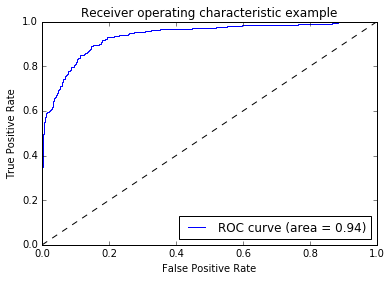

In [212]:
from sklearn.metrics import roc_curve, auc
y_score=clf_soft_pre.decision_function(twenty_test_data)
fpr, tpr, _ = roc_curve(twenty_test.target, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

##### Recall and precision of your classifier. [Reference Link](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

In [213]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
X_train = twenty_train_data
X_test = twenty_test_data
y_train = twenty_train.target
y_test = twenty_test.target
y_score = clf_soft_pre.decision_function(X_test_lsi)
y = label_binarize(twenty_train.target, classes=[0, 1])
# n_classes = y.shape
#print n_classes
# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
#for i in range(n_classes):
precision, recall, _ = precision_recall_curve(y_test,y_score)    
average_precision = average_precision_score(y_test, y_score)

# print precision
# print recall
print average_precision

0.945550332196


### Problem (g)

##### Naïve Bayes Algorithm [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

In [215]:
from sklearn.naive_bayes import GaussianNB
clf_naive_bayes = GaussianNB().fit(X_train_lsi, twenty_train.target)

In [216]:
X_test_lsi = data_process(twenty_test)
predicted = clf_naive_bayes.predict(X_test_lsi)
print predicted.shape
score = clf_naive_bayes.score(X_test_lsi, twenty_test.target)
print score

(785,)
0.687898089172


### Building a pipeline
In order to make the vectorizer => transformer => classifier easier to work with, scikit-learn provides a Pipeline class that behaves like a compound classifier:

In [ ]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])

In [ ]:
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

In [ ]:
import numpy as np
twenty_test = fetch_20newsgroups(subset='test',
    categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target) 

In [ ]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predicted,
    target_names=twenty_test.target_names))

metrics.confusion_matrix(twenty_test.target, predicted)